## CIS 635 Project

### Leveraging Data Mining to Understand and Predict Airbnb Listing Prices

#### Loading required libraries

In [61]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Downloading data from kaggle website

The data we are using for this project is hosted in kaggle. [U.S. Airbnb Open Data](https://www.kaggle.com/datasets/kritikseth/us-airbnb-open-data)

#### Downloading datasets in csv format

In [62]:
#Path to the dataset
path = kagglehub.dataset_download("kritikseth/us-airbnb-open-data")


Using Colab cache for faster access to the 'us-airbnb-open-data' dataset.


In [63]:
#Connecting to files in path
csv_path1 = os.path.join(path, "AB_US_2020.csv")
csv_path2 = os.path.join(path, "AB_US_2023.csv")
#Load the data from CSV files
df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
#Previewing the two datasets
print(df1.describe())
print(df2.describe())

/tmp/ipython-input-798040142.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(csv_path1)
/tmp/ipython-input-798040142.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(csv_path2)


                 id       host_id       latitude      longitude  \
count  2.260300e+05  2.260300e+05  226030.000000  226030.000000   
mean   2.547176e+07  9.352385e+07      35.662829    -103.220662   
std    1.317814e+07  9.827422e+07       6.849855      26.222091   
min    1.090000e+02  2.300000e+01      18.920990    -159.714900   
25%    1.515890e+07  1.399275e+07      32.761783    -118.598115   
50%    2.590916e+07  5.138266e+07      37.261125     -97.817200   
75%    3.772624e+07  1.497179e+08      40.724038     -76.919323   
max    4.556085e+07  3.679176e+08      47.734620     -70.995950   

               price  minimum_nights  number_of_reviews  reviews_per_month  \
count  226030.000000    2.260300e+05      226030.000000       177428.00000   
mean      219.716529    4.525490e+02          34.506530            1.43145   
std       570.353609    2.103376e+05          63.602914            1.68321   
min         0.000000    1.000000e+00           0.000000            0.01000   
25%   

In [64]:
#checking the length of columns in df1 and df2
print(f'Columns in df1 = {len(df1.columns)}')
print(f'Columns in df2 = {len(df2.columns)}')

Columns in df1 = 17
Columns in df2 = 18


In [65]:
#Selecting columns common in both df1 and df2 before concatenating the dataframes
df1_cols = set(df1.columns)
df2_cols = set(df2.columns)

#Common columns
common = df1_cols & df2_cols
unique_to_df2 = df2_cols - df1_cols
print("Common columns:", common)
print("Columns unique to df2:", unique_to_df2)

Common columns: {'price', 'minimum_nights', 'room_type', 'host_name', 'neighbourhood_group', 'id', 'longitude', 'last_review', 'calculated_host_listings_count', 'name', 'reviews_per_month', 'host_id', 'neighbourhood', 'number_of_reviews', 'availability_365', 'latitude', 'city'}
Columns unique to df2: {'number_of_reviews_ltm'}


In [66]:
# Finding unique columns in df1 (columns that are in df1 but not in df2)
unique_df1 = df1_cols - df2_cols
print("\nColumns unique to df1:", unique_df1)
# Finding unique columns in df2 (columns that are in df2 but not in df1)
unique_df2 = df2_cols - df1_cols
print("\nColumns unique to df2:", unique_df2)


Columns unique to df1: set()

Columns unique to df2: {'number_of_reviews_ltm'}


In [67]:
#selecting only common columns in df2 to merge df1.
df2 = df2[list(common)]
len(df2.columns)

17

In [68]:
#concatenating df1 and df2
joined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
merged_df = joined_df.copy()

In [69]:
joined_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [70]:
joined_df.shape

(458177, 17)

The dataframe consists of 458177 entries and 17 variables.

In [71]:
#Checking the data types of various variables in the dataframe.
print(joined_df.info(show_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458177 entries, 0 to 458176
Data columns (total 17 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   name                            object 
 2   host_id                         int64  
 3   host_name                       object 
 4   neighbourhood_group             object 
 5   neighbourhood                   object 
 6   latitude                        float64
 7   longitude                       float64
 8   room_type                       object 
 9   price                           int64  
 10  minimum_nights                  int64  
 11  number_of_reviews               int64  
 12  last_review                     object 
 13  reviews_per_month               float64
 14  calculated_host_listings_count  int64  
 15  availability_365                int64  
 16  city                            object 
dtypes: float64(3), int64(7), obje

#### Checking the number of missing values for every column in joined df

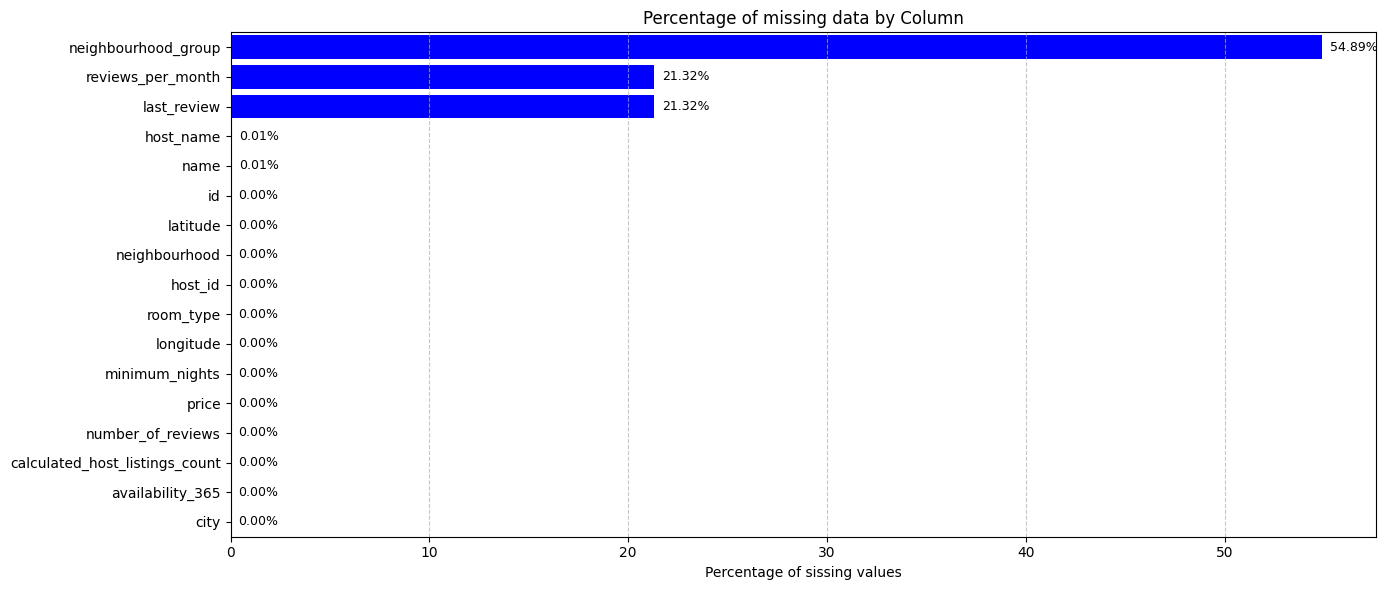

In [72]:
missing_counts = joined_df.isnull().sum()
missing_df = pd.DataFrame({'column': missing_counts.index,
                           'missing_percent': (missing_counts.values/len(joined_df))*100
                           })
missing_df = missing_df.sort_values(by='missing_percent', ascending=False)
plt.figure(figsize=(14, 6))
bars = plt.barh(missing_df['column'], missing_df['missing_percent'], color='blue')
plt.ylim(-0.5, len(missing_df['column']) - 0.5)
plt.xlabel('Percentage of sissing values')
plt.title('Percentage of missing data by Column')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar, percent in zip(bars, missing_df['missing_percent']):
    plt.text(percent + 0.4, bar.get_y() + bar.get_height()/2,
             f'{percent:.2f}%', va='center', fontsize=9)
plt.tight_layout()
plt.show()

Neighbourhood_group variable has the highest number of missing values at 54.89% of the total entries for neighbourhood_group. Reviews_per_month and last_review both have 21.32% of missing values. host_name and name have 0.01% of missing values which is negligible.

In [73]:
cleaned_df = joined_df.dropna()
cleaned_df.shape

(157742, 17)

The consequences of dropping missign values from the dataframe results to a reduction of the number of entries from 450,000 plus to 157742. What other ways do you suggest we consider?

In [81]:
# Summary statistics for numerical columns in the cleaned_df
print(cleaned_df.select_dtypes(include=['number']).describe().T)


                                   count          mean           std  \
id                              157742.0  8.391846e+16  2.265989e+17   
host_id                         157742.0  1.098741e+08  1.262494e+08   
latitude                        157742.0  3.679351e+01  6.750772e+00   
longitude                       157742.0 -1.015898e+02  2.873207e+01   
price                           157742.0  1.913800e+02  6.756541e+02   
minimum_nights                  157742.0  1.232636e+01  2.484806e+01   
number_of_reviews               157742.0  3.998977e+01  6.898790e+01   
reviews_per_month               157742.0  1.254196e+00  1.641150e+00   
calculated_host_listings_count  157742.0  1.339558e+01  5.391405e+01   
availability_365                157742.0  1.596860e+02  1.390968e+02   

                                      min           25%           50%  \
id                              109.00000  1.467339e+07  2.815212e+07   
host_id                         521.00000  1.333753e+07  5.26

Considered including ID, longitude and latitude however, we can exclude since they are not continuous and it isn't very meaningful to have their summary statistics

In [75]:
# Checking for duplicates in the cleaned_df
print("Duplicate Check")
duplicate_rows = cleaned_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Duplicate Check
Number of duplicate rows: 0


There are no duplicate rows in the data set

In [76]:
# Combined check of data type, unique values and missingness per column
print("Data Type, Unique Values, and Missingness")
data_summary = pd.DataFrame({
    'dtype': cleaned_df.dtypes,
    'unique_values': cleaned_df.nunique(),
    'missing_percent': cleaned_df.isnull().mean() * 100
}).sort_values(by='missing_percent', ascending=False)

print(data_summary, "\n")

Data Type, Unique Values, and Missingness
                                  dtype  unique_values  missing_percent
id                                int64         125402              0.0
name                             object         129609              0.0
host_id                           int64          73849              0.0
host_name                        object          21032              0.0
neighbourhood_group              object             34              0.0
neighbourhood                    object            640              0.0
latitude                        float64          79719              0.0
longitude                       float64          80088              0.0
room_type                        object              4              0.0
price                             int64           1672              0.0
minimum_nights                    int64            134              0.0
number_of_reviews                 int64            696              0.0
last_review           

The cleaned_df has no missing values since they were already dropped in the joined_df

In [77]:
# Checking for skewness of numeric columns
print("Skewness of Numeric Columns")
skew_values = num_df.skew().sort_values(ascending=False)
print(skew_values, "\n")

Skewness of Numeric Columns
price                             101.827340
minimum_nights                     18.152755
calculated_host_listings_count     10.717893
reviews_per_month                   5.754706
number_of_reviews                   4.025359
id                                  2.372793
host_id                             1.336339
availability_365                    0.211695
longitude                          -0.432269
latitude                           -1.043469
dtype: float64 



Most numeric columns in the dataset are highly right-skewed, particularly price, minimum_nights, and calculated_host_listings_count, indicating a few extreme high values. In contrast, latitude, longitude, and availability are roughly symmetrical, while the ID columns are skewed but not meaningful for analysis.

In [83]:
# Checking for the logical consistency of the variables for reasonable ranges
print("Logical Consistency Checks")
# Check 'price' for invalid values
if 'price' in cleaned_df.columns:
    invalid_prices = cleaned_df[cleaned_df['price'] <= 0]
    print(f"Listings with invalid price values (<=0): {len(invalid_prices)}")
# Check 'minimum_nights' for reasonable range
if 'minimum_nights' in cleaned_df.columns:
    print(f"Minimum nights range: {cleaned_df['minimum_nights'].min()} - {cleaned_df['minimum_nights'].max()}")
# Check 'number_of_reviews' for reasonable range
if 'number_of_reviews' in cleaned_df.columns:
    print(f"Number of reviews range: {cleaned_df['number_of_reviews'].min()} - {cleaned_df['number_of_reviews'].max()}")
# Check 'reviews_per_month' for reasonable range
if 'reviews_per_month' in cleaned_df.columns:
    print(f"Reviews per month range: {cleaned_df['reviews_per_month'].min()} - {cleaned_df['reviews_per_month'].max()}")
# Check 'calculated_host_listings_count' for reasonable range
if 'calculated_host_listings_count' in cleaned_df.columns:
    print(f"Host listings count range: {cleaned_df['calculated_host_listings_count'].min()} - {cleaned_df['calculated_host_listings_count'].max()}")
# Check 'availability_365' for reasonable range
if 'availability_365' in cleaned_df.columns:
    print(f"Availability 365 range: {cleaned_df['availability_365'].min()} - {cleaned_df['availability_365'].max()}")
# Check 'latitude' and 'longitude' for geographic bounds
if 'latitude' in cleaned_df.columns:
    print(f"Latitude range: {cleaned_df['latitude'].min()} - {cleaned_df['latitude'].max()}")
if 'longitude' in cleaned_df.columns:
    print(f"Longitude range: {cleaned_df['longitude'].min()} - {cleaned_df['longitude'].max()}")


Logical Consistency Checks
Listings with invalid price values (<=0): 37
Minimum nights range: 1 - 1250
Number of reviews range: 1 - 2084
Reviews per month range: 0.01 - 86.61
Host listings count range: 1 - 1003
Availability 365 range: 0 - 365
Latitude range: 18.92099 - 47.73462
Longitude range: -159.7149 - -71.12342


The dataset is mostly logically consistent, with only 37 listings having invalid prices, while other numeric features such as minimum nights, number of reviews, reviews per month, host listings count, availability, and geographic coordinates, fall within plausible but sometimes extreme ranges.

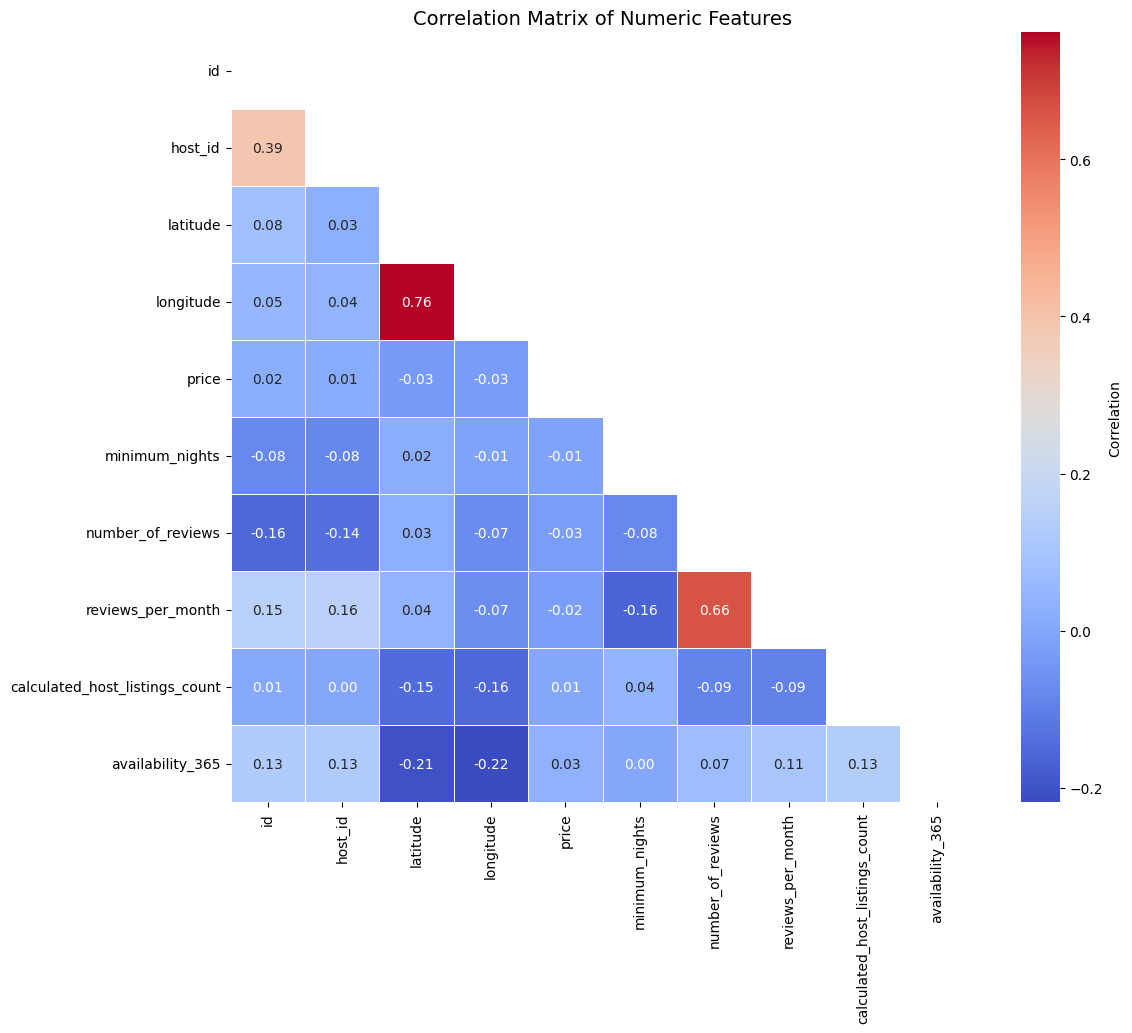

In [79]:
# Compute correlation matrix for numeric columns
corr_matrix = num_df.corr()
# Upper triangle mask (to hide duplicate correlations)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Correlation'},
    linewidths=0.5
)
plt.title('Correlation Matrix of Numeric Features', fontsize=14)
plt.show()


Variables are mostly not highly correlated

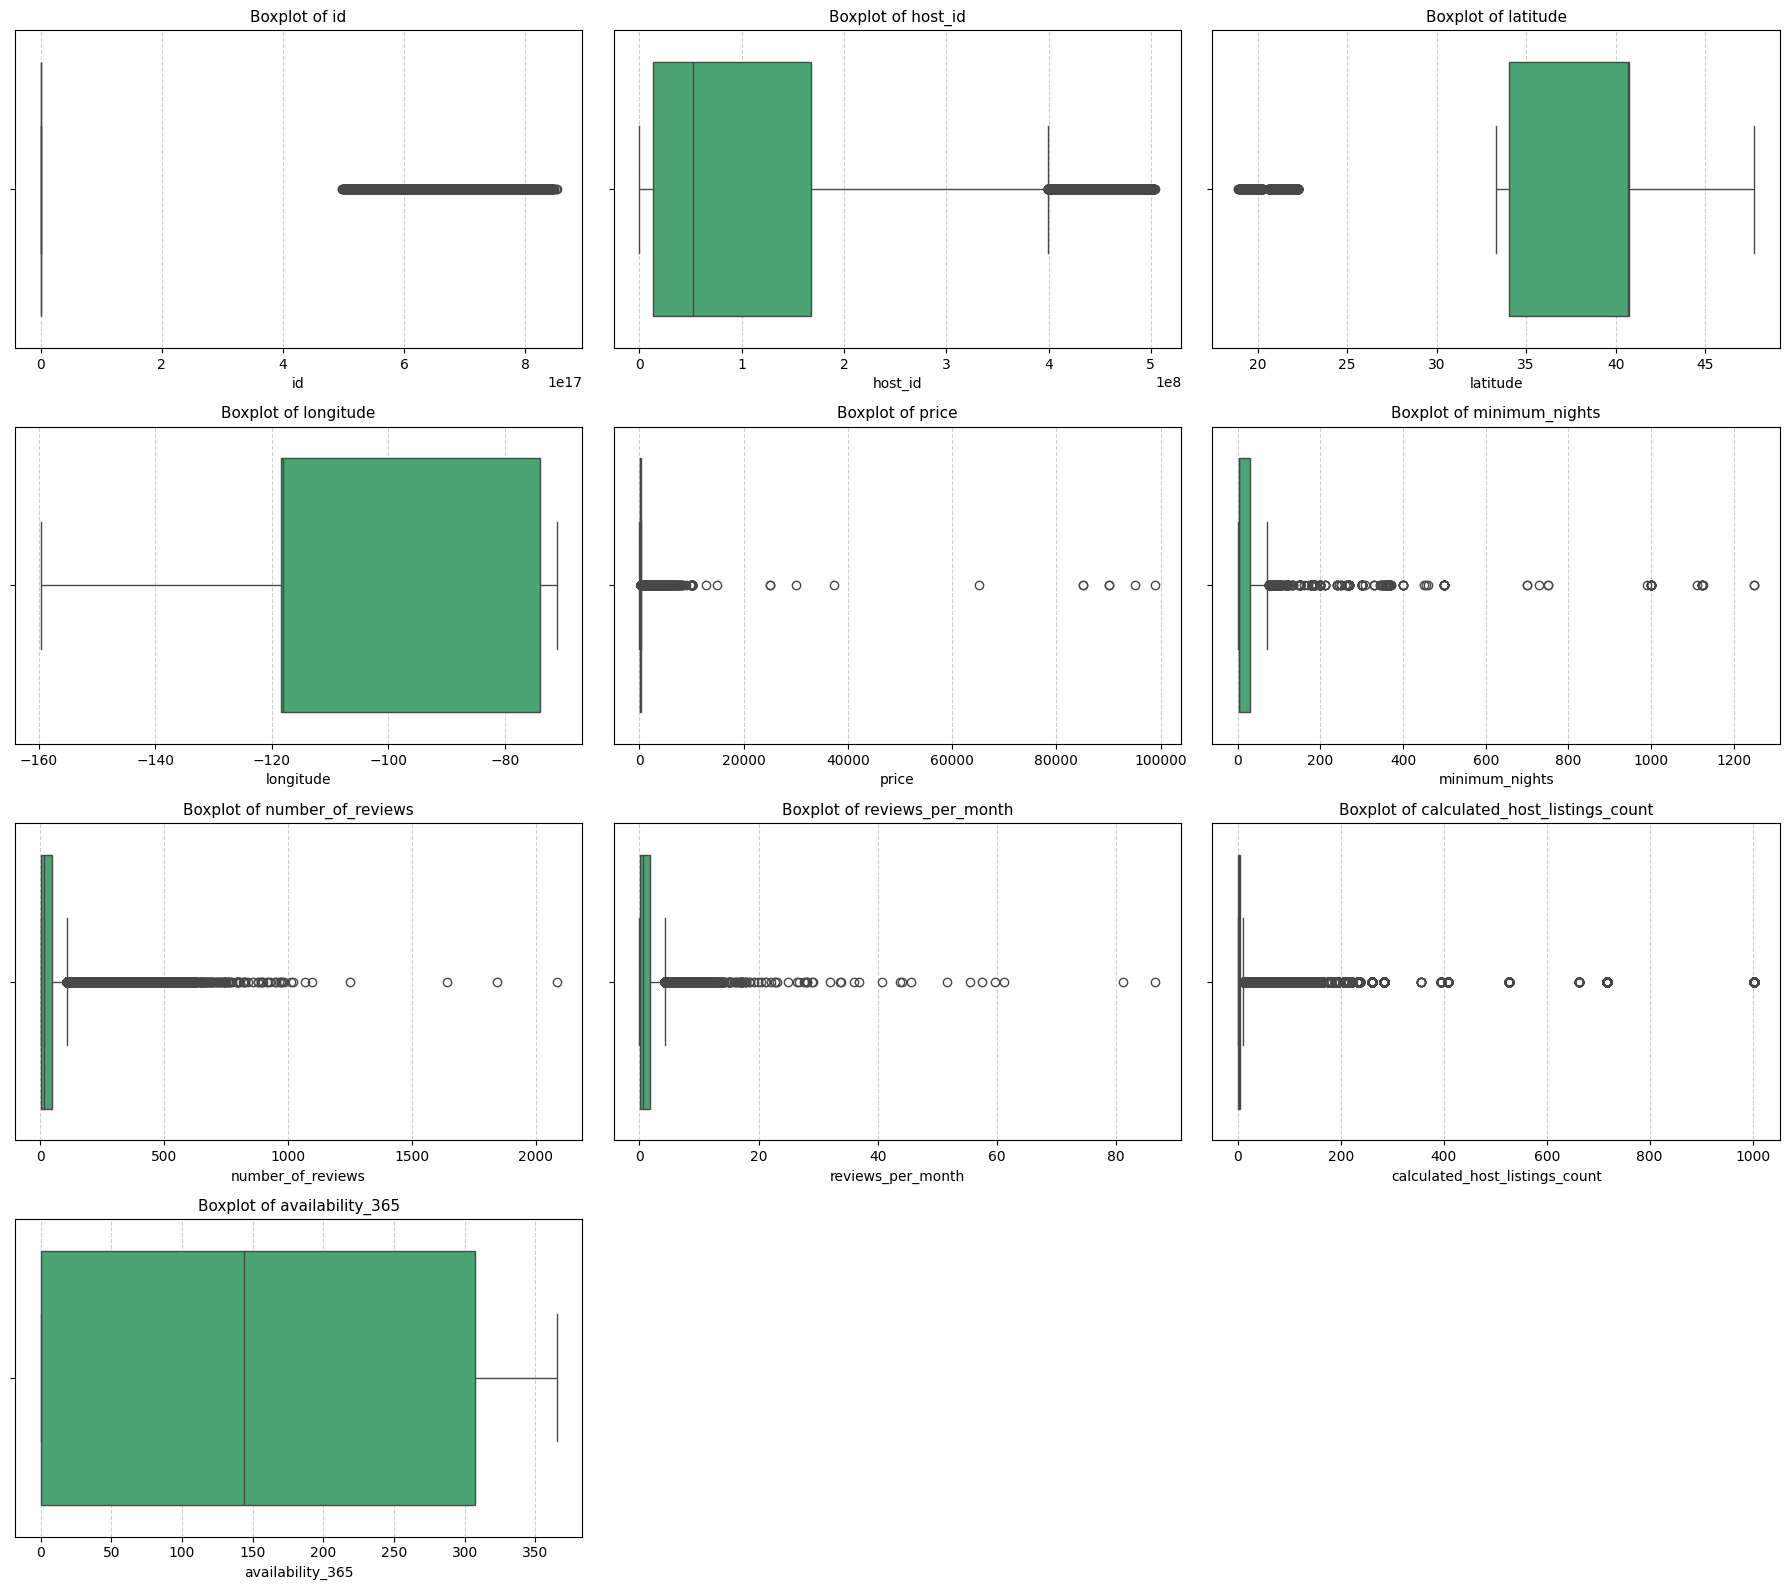

In [80]:
# Viewing the outliers in box plots
# Select only numeric columns (including IDs)
numeric_cols = cleaned_df.select_dtypes(include=['number']).columns
# Determine grid size (3 per row)
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)
# Create figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()
# Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=cleaned_df[col], color='mediumseagreen', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=11)
    axes[i].set_xlabel(col)
    axes[i].grid(axis='x', linestyle='--', alpha=0.6)
# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

There are extreme outliers visible in the varaibles that need to be discussed by the team